<a href="https://colab.research.google.com/github/BritneyMuller/colab-notebooks/blob/master/Quick_%26_Dirty_Internal_Link_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internal Link Analysis

Made by [![Follow](https://img.shields.io/twitter/follow/BritneyMuller?style=social)](https://twitter.com/BritneyMuller)

Please contact britneymuller@gmail.com with Subject [Colab Link Analysis] with any questions.

Explore: [github.com/BritneyMuller/colab-notebooks ](github.com/BritneyMuller/colab-notebooks)for more Notebook examples

# Upload internal link data via Screaming Frog 🐸


![Export internal link csv to your local computer](https://i.ibb.co/5W2crVy/Screen-Shot-2020-02-26-at-12-14-13-AM.png)

---
Before you start click: 

> 'Edit' -> 'Notebook Settings' and change 'Hardware Accelerator' to GPU.

---



Note: [Shift + Return] is the shortcut to run a single cell. 

Try running the code below by clicking into the cell and doing [Shift + Return].


In [ ]:
import csv
import json
import requests
import pandas as pd
import numpy as np
import re
from IPython.display import display

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving berkey-inlinks.csv to berkey-inlinks.csv


Upload data as "df" (dataframe)

In [ ]:
df = pd.read_csv("lp-inlinks.csv")

Look at the first 5 lines (this includes the header)


In [ ]:
df.head()

,Type,From,To,Anchor Text,Alt Text,Follow,Link Attributes
0,AHREF,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/,Skip to content,NaN,True,NaN
1,AHREF,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/,NaN,Berkey Filters Logo,True,NaN
2,AHREF,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/,NaN,NaN,True,NaN
3,AHREF,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/,Become a Dealer,NaN,True,NaN
4,AHREF,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/,Created with Sketch. Watch Our Water Story,NaN,True,NaN


In [ ]:
df.tail()

,Type,From,To,Anchor Text,Alt Text,Follow,Link Attributes
45604,AHREF,https://www.berkeyfilters.com/blogs/berkey-lif...,https://www.berkeyfilters.com/blogs/berkey-lif...,9,NaN,True,NaN
45605,AHREF,https://www.berkeyfilters.com/blogs/berkey-lif...,https://www.berkeyfilters.com/blogs/berkey-lif...,Next,NaN,True,NaN
45606,AHREF,https://www.berkeyfilters.com/blogs/berkey-lif...,https://www.berkeyfilters.com/blogs/berkey-lif...,Previous,NaN,True,NaN
45607,AHREF,https://www.berkeyfilters.com/blogs/berkey-lif...,https://www.berkeyfilters.com/blogs/berkey-lif...,9,NaN,True,NaN
45608,AHREF,https://www.berkeyfilters.com/blogs/berkey-lif...,https://www.berkeyfilters.com/blogs/berkey-lif...,Skip to content,NaN,True,NaN


## Evaluate internal link counts

In [ ]:
df['To'].value_counts()

https://www.berkeyfilters.com/products/sport-berkey                                                                           1158
https://www.berkeyfilters.com/pages/berkey-water-filter-policies                                                              1143
https://www.berkeyfilters.com/collections/berkey-water-filter-systems                                                         1104
https://www.berkeyfilters.com/                                                                                                 867
https://www.berkeyfilters.com/pages/berkey-answers                                                                             833
                                                                                                                              ... 
https://www.berkeyfilters.com/blogs/berkey-life/www.iheartcats.com/could-tap-water-be-causing-health-issues-in-pets/%20          1
https://www.berkeyfilters.com/berkey-water-filters/go-berkey.html                  

# Evaluate internal anchor text count

In [ ]:
df['Anchor Text'].value_counts()

Are Your Children Drinking Safe Water?                          588
Why Filtered Water Matters                                      588
20+ Ways To Use Berkey Water                                    588
What is Berkey Livin'?                                          588
Pets Need Filtered Water Too!                                   588
                                                               ... 
BUNDLE SALE : Travel Berkey® with Fluoride Filters : 1.5 Gal      1
Black Berkey element                                              1
Berkey Purification Process                                       1
compare the competition                                           1
the filtration process                                            1
Name: Anchor Text, Length: 578, dtype: int64

## Find all links to 'X' Page

In [ ]:
df_filtered = df[(df['To'].str.contains("/collections/berkey-water-filter-systems", regex=True)==True)]
df_filtered.head(100)
#"From" URLs use targeted Anchor Text

,From,To,Anchor Text
16502,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,Water Filter Systems
16503,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,Shop All
16504,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,Shop All
16505,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,NaN
16506,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,Choose your Berkey
...,...,...,...
16597,https://www.berkeyfilters.com/products/crown-b...,https://www.berkeyfilters.com/collections/berk...,Water Filter Systems
16598,https://www.berkeyfilters.com/products/crown-b...,https://www.berkeyfilters.com/collections/berk...,Shop Water Filters
16599,https://www.berkeyfilters.com/products/crown-b...,https://www.berkeyfilters.com/collections/berk...,Water Filter Systems
16600,https://www.berkeyfilters.com/products/berkey-...,https://www.berkeyfilters.com/collections/berk...,Water Filter Systems


In [ ]:
df_filtered = df[df["To"]=='https://www.berkeyfilters.com/collections/berkey-water-filter-systems']

In [ ]:
df_filtered.head()

,From,To,Anchor Text
16502,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,Water Filter Systems
16503,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,Shop All
16504,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,Shop All
16505,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,NaN
16506,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,Choose your Berkey
16507,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,The Berkey water filter system
16508,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,Berkey water filters
16509,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,Shop Water Filters
16510,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/collections/berk...,Water Filter Systems
16511,https://www.berkeyfilters.com/pages/reverse-os...,https://www.berkeyfilters.com/collections/berk...,Water Filter Systems


In [ ]:
print(df.dtypes)

Type                object
From                object
To                  object
Anchor Text         object
Alt Text            object
Follow                bool
Link Attributes    float64
dtype: object


In [ ]:
#data cleanup
#drop extra columns
df = df[['From', 'To', 'Anchor Text']]

In [ ]:
df.head()

,From,To,Anchor Text
0,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/,Skip to content
1,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/,NaN
2,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/,NaN
3,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/,Become a Dealer
4,https://www.berkeyfilters.com/,https://www.berkeyfilters.com/,Created with Sketch. Watch Our Water Story


#Now that we have your internal links cleaned and organized within a dataframe, let's bring in your keyword data!

The following example uses Moz's Ranking Keywords for Domain (berkeyfilters.com) export. 

You could also use or pull in GSC data (additional db cleanup might be required) 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving berkey-cannibalization.csv to berkey-cannibalization.csv


In [ ]:
df2 = pd.read_csv("berkey-cannibalization.csv")

In [ ]:
df2.head()

,Keyword,Position,Volume,URL,Cannibalization
0,alexapure vs berkey,12,250,https://www.berkeyfilters.com/pages/berkey-vs-...,na
1,aquatru vs berkey,2,90,https://www.berkeyfilters.com/pages/berkey-vs-...,na
2,barkley water filter,9,10,https://www.berkeyfilters.com/,na
3,berke water filter,1,80,https://www.berkeyfilters.com/,na
4,berke water filter,1,80,https://www.berkeyfilters.com/collections/berk...,na


In [ ]:
#data cleanup
#drop extra columns
df2 = df2[['Keyword', 'Position', 'Volume', 'URL']]

In [ ]:
# Select all duplicate rows based on one column
duplicateRowsDF = df2[df2.duplicated(['Keyword'])]
 
print("Duplicate Keywords based on a single column are:", duplicateRowsDF, sep='\n')

Duplicate Keywords based on a single column are:
                               Keyword  ...                                                URL
4                   berke water filter  ...  https://www.berkeyfilters.com/collections/berk...
5                   berke water filter  ...  https://www.berkeyfilters.com/products/big-berkey
7                  berkee water filter  ...  https://www.berkeyfilters.com/pages/bundle-and...
8                  berkee water filter  ...  https://www.berkeyfilters.com/berkey-water-fil...
9                  berkee water filter  ...  https://www.berkeyfilters.com/collections/berk...
...                                ...  ...                                                ...
1074  what is in a berkey water filter  ...  https://www.berkeyfilters.com/collections/berk...
1075  what is in a berkey water filter  ...  https://www.berkeyfilters.com/products/big-berkey
1077     when to replace berkey filter  ...  https://www.berkeyfilters.com/pages/black-berk...
1

#All Cannibiliazion Keywords HERE:

---



In [ ]:
duplicateRowsDF.head(30)

,Keyword,Position,Volume,URL
4,berke water filter,1,80,https://www.berkeyfilters.com/collections/berk...
5,berke water filter,1,80,https://www.berkeyfilters.com/products/big-berkey
7,berkee water filter,1,80,https://www.berkeyfilters.com/pages/bundle-and...
8,berkee water filter,1,80,https://www.berkeyfilters.com/berkey-water-fil...
9,berkee water filter,1,80,https://www.berkeyfilters.com/collections/berk...
10,berkee water filter,1,80,https://www.berkeyfilters.com/products/big-berkey
11,berkee water filter,1,80,https://www.berkeyfilters.com/products/royal-b...
12,berkee water filter,1,80,https://www.berkeyfilters.com/products/travel-...
14,berkeley filter,1,80,https://www.berkeyfilters.com/products/big-berkey
15,berkeley filter,1,80,https://www.berkeyfilters.com/berkey-water-fil...


In [ ]:
duplicateRowsDF.count()

Keyword     704
Position    704
Volume      704
URL         704
dtype: int64

# Download Dataframe to CSV:


In [ ]:
df.to_csv('data-output/my-data.csv')

Join internal link data

In [ ]:
#working on how to do this. Hamlet Batista, where you at? :) Can't get any fancy melts or joins to do this + asked a dozen people about this. {shrug}



---

##Trying to vizualize the internal link graph a bit...(bare with me)

---



In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


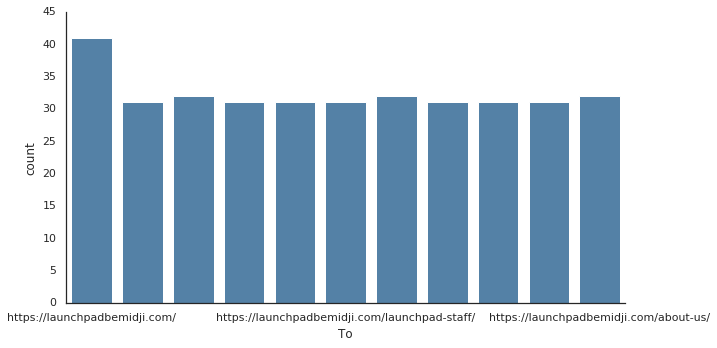

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("To", data=df, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

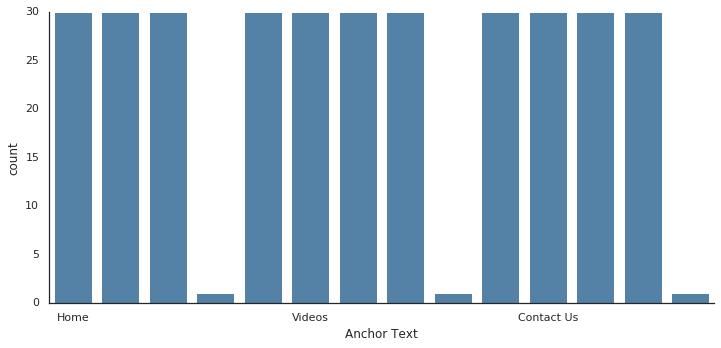

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot("Anchor Text", data=df, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

TypeError: ignored

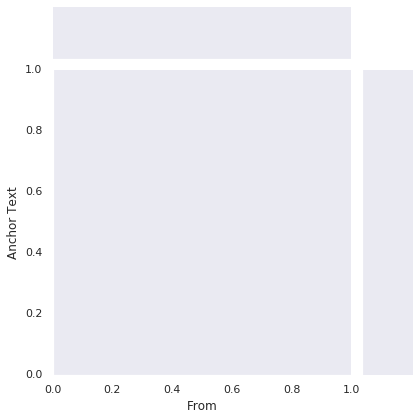

In [ ]:
with sns.axes_style('dark'):
    sns.jointplot("From", "Anchor Text", data=df, kind='hex')

In [ ]:
import ipywidgets as widgets


In [ ]:
widgets.Textarea(
    value='',
    placeholder='Type url here',
    description='Internal links:',
    disabled=False
)

Textarea(value='', description='Internal links:', placeholder='Type url here')

In [ ]:
df_filtered = df[(df['To'].str.contains(widgets.Textarea, regex=True)==True)]
df_filtered.head(15)

TypeError: ignored

In [ ]:
!pip install requests